<a href="https://colab.research.google.com/github/impashree/SVR/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


importing dataset

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x)
print()
print(y)


[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

splitting the dataset into traning and testing set


In [4]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30, random_state=1)


 feature scaling


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)


traning the logistic regression model


In [6]:
from sklearn.svm import SVC
regressor = SVC(kernel='linear',random_state=0)
regressor.fit(xtrain,ytrain)


SVC(kernel='linear', random_state=0)

predicting the values


In [16]:
ypred = regressor.predict(xtest)
print(ypred)

[0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]


confusion matrix


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred)
print(cm)
accuracy_score(ytest, ypred)


[[65  7]
 [20 28]]


0.775

plotting the traning set


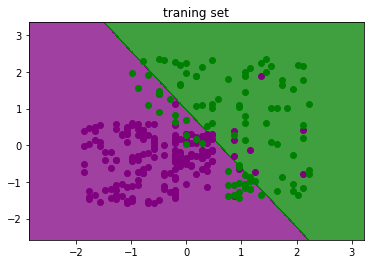

In [11]:
from matplotlib.colors import ListedColormap
xset,yset = xtrain, ytrain
x1,x2 = np.meshgrid(np.arange(start=xset[:,0].min()-1, stop = xset[:,0].max()+1, step=0.01), np.arange(start=xset[:,1].min()-1, stop = xset[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,regressor.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75, cmap=ListedColormap(('purple','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(yset)):
  plt.scatter(xset[yset == j,0],xset[yset == j,1],c=ListedColormap(('purple','green'))(i),label=j)
plt.title('traning set')
plt.show()


plotting the test set


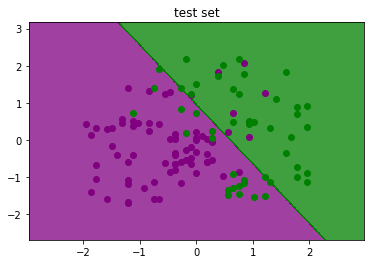

In [12]:
from matplotlib.colors import ListedColormap
xset,yset = xtest, ytest
x1,x2 = np.meshgrid(np.arange(start=xset[:,0].min()-1, stop = xset[:,0].max()+1, step=0.01), np.arange(start=xset[:,1].min()-1, stop = xset[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,regressor.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75, cmap=ListedColormap(('purple','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(yset)):
  plt.scatter(xset[yset == j,0],xset[yset == j,1],c=ListedColormap(('purple','green'))(i),label=j)
plt.title('test set')
plt.show()
